In this project we will be looking at unemployment data regarding the 50 United States by answering questions and making predictions. We will first be looking at trends in unemployment and labor participation rates with visualizations.

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.formula.api import ols, logit
import statsmodels.api as sm
from numpy.random import seed, choice


In [2]:
#load/view data
df = pd.read_csv('Unemployment in America Per US State.csv')
display(df.head())
print("**************************")
print(df.shape)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


**************************
(29892, 11)


In [3]:
#chcek states
states = df['State/Area'].unique()
print(states)
print('****************')
print("Length of states list: " + str(len(states)))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Los Angeles County'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'New York city'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
****************
Length of states list: 53


As we can see there are 53 values in the states list where there should only be 50, this means we must remove the 3 non-states from the data frame('District of Columbia', 'Los Angeles County', 'New York city')

In [4]:
states_to_drop = ['District of Columbia', 'Los Angeles County', 'New York city']
for lab, row in df.iterrows():
    if row['State/Area'] in states_to_drop:
        df.drop(lab, inplace=True)

display(df.head(3))
print("********************************************************************************************************************************************")
print(df.shape)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2


********************************************************************************************************************************************
(28200, 11)


Now we must change the columns with commas/that are strings

In [5]:
cols_to_convert = [
    'Total Civilian Non-Institutional Population in State/Area', 'Total Civilian Labor Force in State/Area',
    'Total Employment in State/Area', 'Total Unemployment in State/Area'
]

for col in cols_to_convert:
  df[col] = df[col].apply(lambda x: int(x.replace(',', '')))

display(df.head(2))

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,2605000,1484555,57.0,1386023,53.2,98532,6.6
1,2,Alaska,1976,1,232000,160183,69.0,148820,64.1,11363,7.1


Lets first see which states have the highest median(due to recssions and other skewed data such as data from Covid pandemic) unemployment rates, and then see the states with highest labor-force-participation rates.

In [6]:
# Figure 1. Unemployment and LBPR over time(Qarterly)
national_trend = df[["Year", "Month", "Percent (%) of Labor Force Employed in State/Area", "Percent (%) of Labor Force Unemployed in State/Area"]]
national_trend['Date'] = pd.to_datetime(national_trend[['Year', 'Month']].assign(Day=1))
national_trend.drop(['Year', 'Month'], axis=1, inplace=True)
national_trend.set_index('Date', inplace=True)
# Select only numeric columns for calculating median
numeric_columns = ['Percent (%) of Labor Force Employed in State/Area', 'Percent (%) of Labor Force Unemployed in State/Area']
national_trend = national_trend[numeric_columns].resample('Q').median() # Apply median to numeric columns only

national_trend

<ipython-input-6-9f1f940318fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_trend['Date'] = pd.to_datetime(national_trend[['Year', 'Month']].assign(Day=1))
<ipython-input-6-9f1f940318fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_trend.drop(['Year', 'Month'], axis=1, inplace=True)
<ipython-input-6-9f1f940318fd>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  national_trend = national_trend[numeric_columns].resample('Q').median() # Apply median to numeric columns only


,Percent (%) of Labor Force Employed in State/Area,Percent (%) of Labor Force Unemployed in State/Area
Date,,
1976-03-31,58.15,6.60
1976-06-30,58.45,6.60
1976-09-30,58.65,6.70
1976-12-31,58.80,6.80
1977-03-31,59.10,6.90
...,...,...
2021-12-31,60.00,3.90
2022-03-31,60.85,3.40
2022-06-30,61.30,3.20


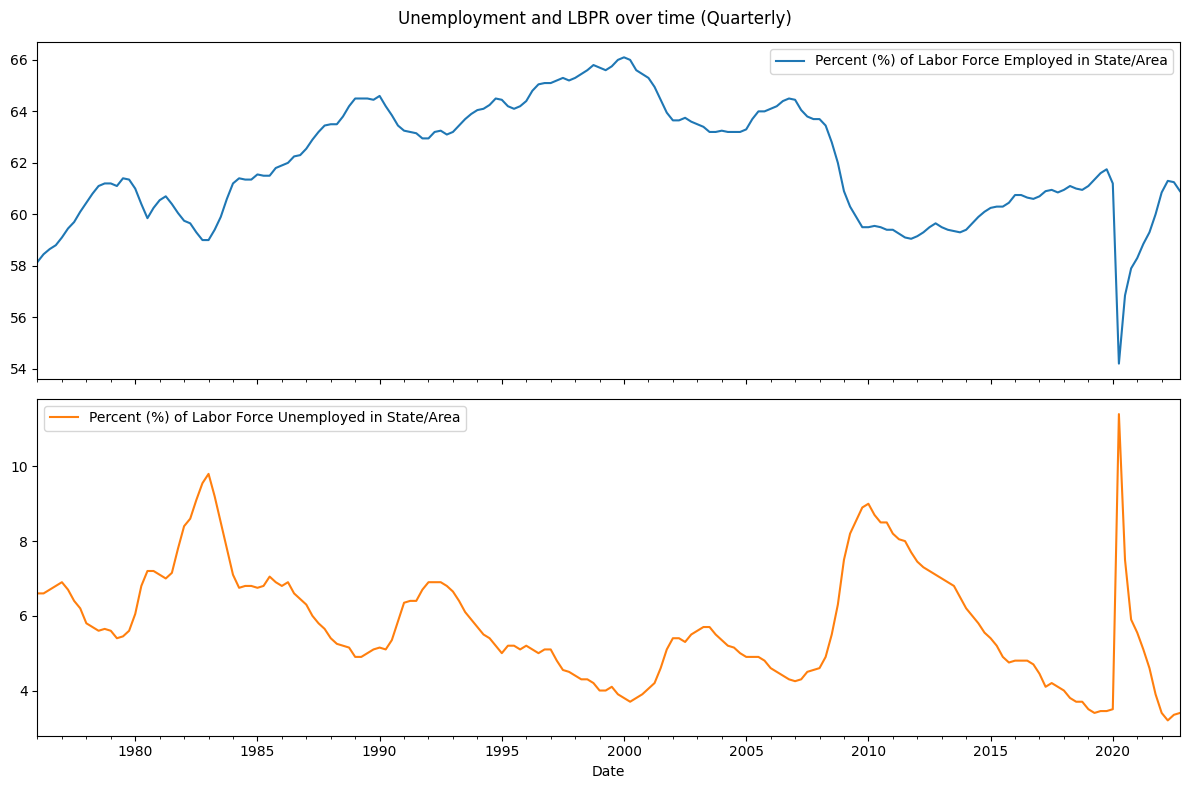

In [7]:
# Figure 1: Plot
national_trend.plot(subplots=True, figsize=(12, 8), title='Unemployment and LBPR over time (Quarterly)')
plt.tight_layout()
plt.show()

In [8]:
median_unemp_data = df.groupby(['State/Area'], as_index=False)\
 [['Percent (%) of Labor Force Unemployed in State/Area', 'Total Unemployment in State/Area']].median()
display(median_unemp_data.head())

,State/Area,Percent (%) of Labor Force Unemployed in State/Area,Total Unemployment in State/Area
0,Alabama,6.5,126494.5
1,Alaska,7.3,22842.0
2,Arizona,5.8,128030.0
3,Arkansas,6.0,71459.5
4,California,6.9,1000704.0


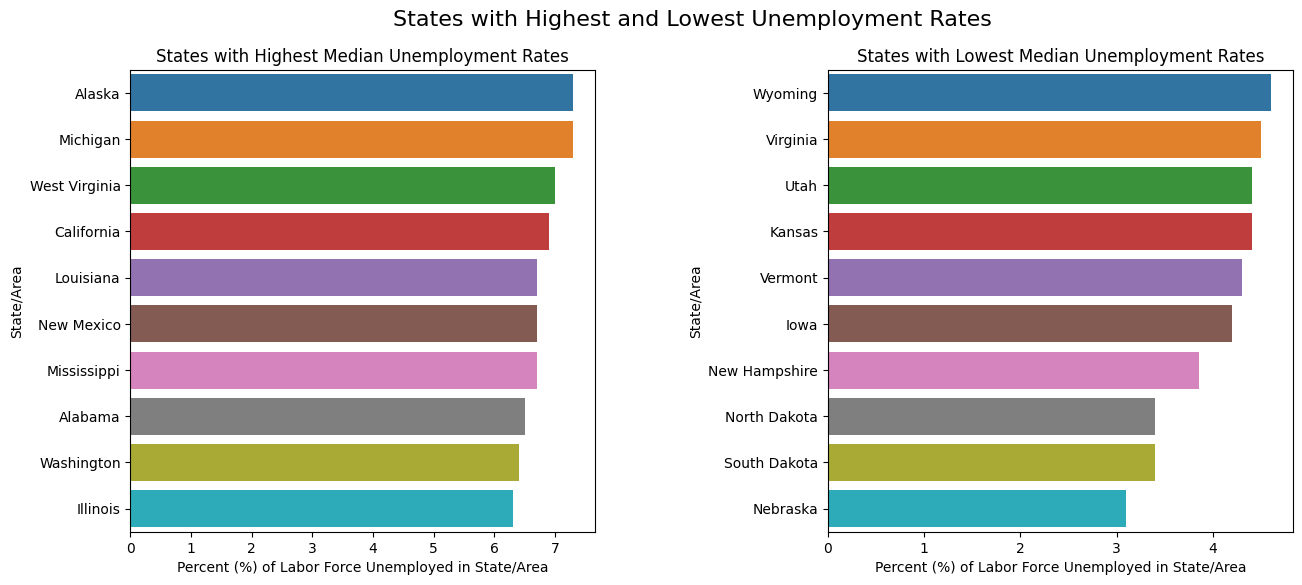

In [9]:
# Plot states with highest and lowest unemployment rates

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('States with Highest and Lowest Unemployment Rates', fontsize=16)
df1 = median_unemp_data.sort_values(by='Percent (%) of Labor Force Unemployed in State/Area', ascending=False).head(10)
df2 = median_unemp_data.sort_values(by='Percent (%) of Labor Force Unemployed in State/Area', ascending=False).tail(10)

sns.barplot(x='Percent (%) of Labor Force Unemployed in State/Area', y='State/Area', data=df1, hue='State/Area', ax=ax[0])
ax[0].set_title('States with Highest Median Unemployment Rates')

sns.barplot(x='Percent (%) of Labor Force Unemployed in State/Area', y='State/Area', data=df2, hue='State/Area', ax=ax[1])
ax[1].set_title('States with Lowest Median Unemployment Rates')

#plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

What we can see is that Alaska and Nebraska have the highest an lowest median unemployment rates in America respectively. Now lets look at state labor force participation rates.

In [10]:
# Groupby media
median_labor_frc_prt_rate = df.groupby(['State/Area'], as_index=False)\
 [['Percent (%) of Labor Force Employed in State/Area', 'Total Employment in State/Area']].median()
display(median_labor_frc_prt_rate.head())

,State/Area,Percent (%) of Labor Force Employed in State/Area,Total Employment in State/Area
0,Alabama,55.7,1991070.5
1,Alaska,65.5,297479.0
2,Arizona,59.2,2372693.0
3,Arkansas,56.1,1197950.0
4,California,60.6,15575043.5


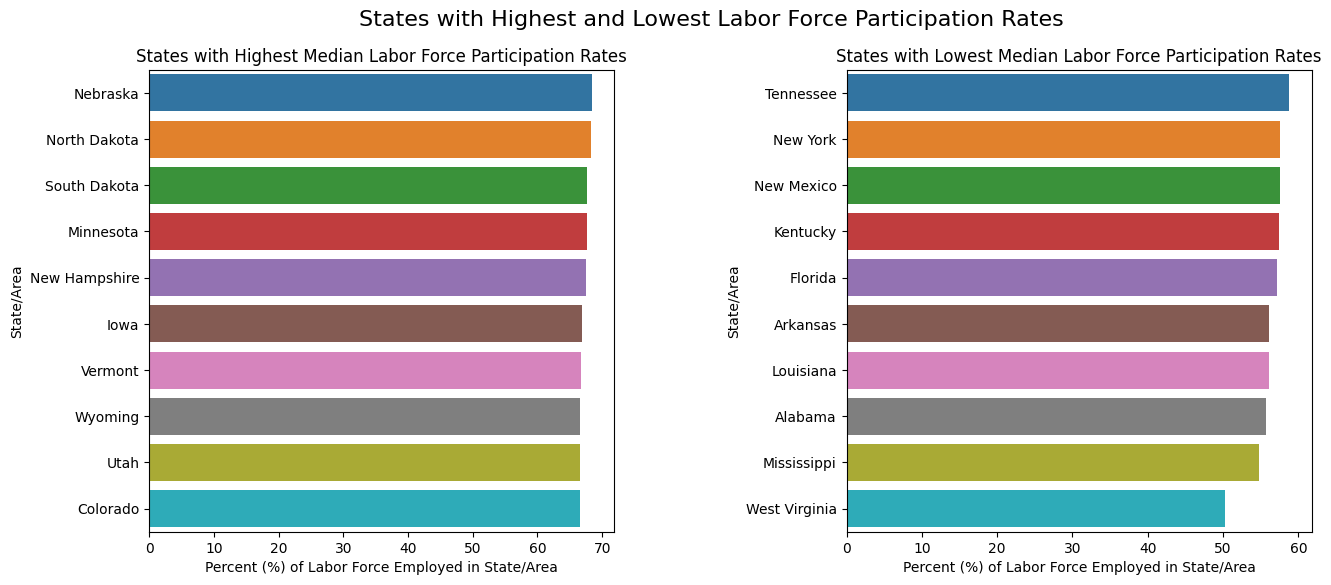

In [11]:
# Create plotly figure showing states with highest and lowest Labor Force Participation

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('States with Highest and Lowest Labor Force Participation Rates', fontsize=16)
frame1 = median_labor_frc_prt_rate.sort_values(by='Percent (%) of Labor Force Employed in State/Area', ascending=False).head(10)
frame2 = median_labor_frc_prt_rate.sort_values(by='Percent (%) of Labor Force Employed in State/Area', ascending=False).tail(10)

sns.barplot(x='Percent (%) of Labor Force Employed in State/Area', y='State/Area', data=frame1, hue='State/Area', ax=ax[0])
sns.barplot(x='Percent (%) of Labor Force Employed in State/Area', y='State/Area', data=frame2, hue='State/Area', ax=ax[1])

ax[0].set_title('States with Highest Median Labor Force Participation Rates')
ax[1].set_title('States with Lowest Median Labor Force Participation Rates')

plt.subplots_adjust(wspace=0.5)


What we see is that Nebraska and Mississippi have the highest and lowest labor force participation rates respectively. Now lets make a plot of the unemployment rate trend in every state.

<Figure size 1800x1200 with 0 Axes>

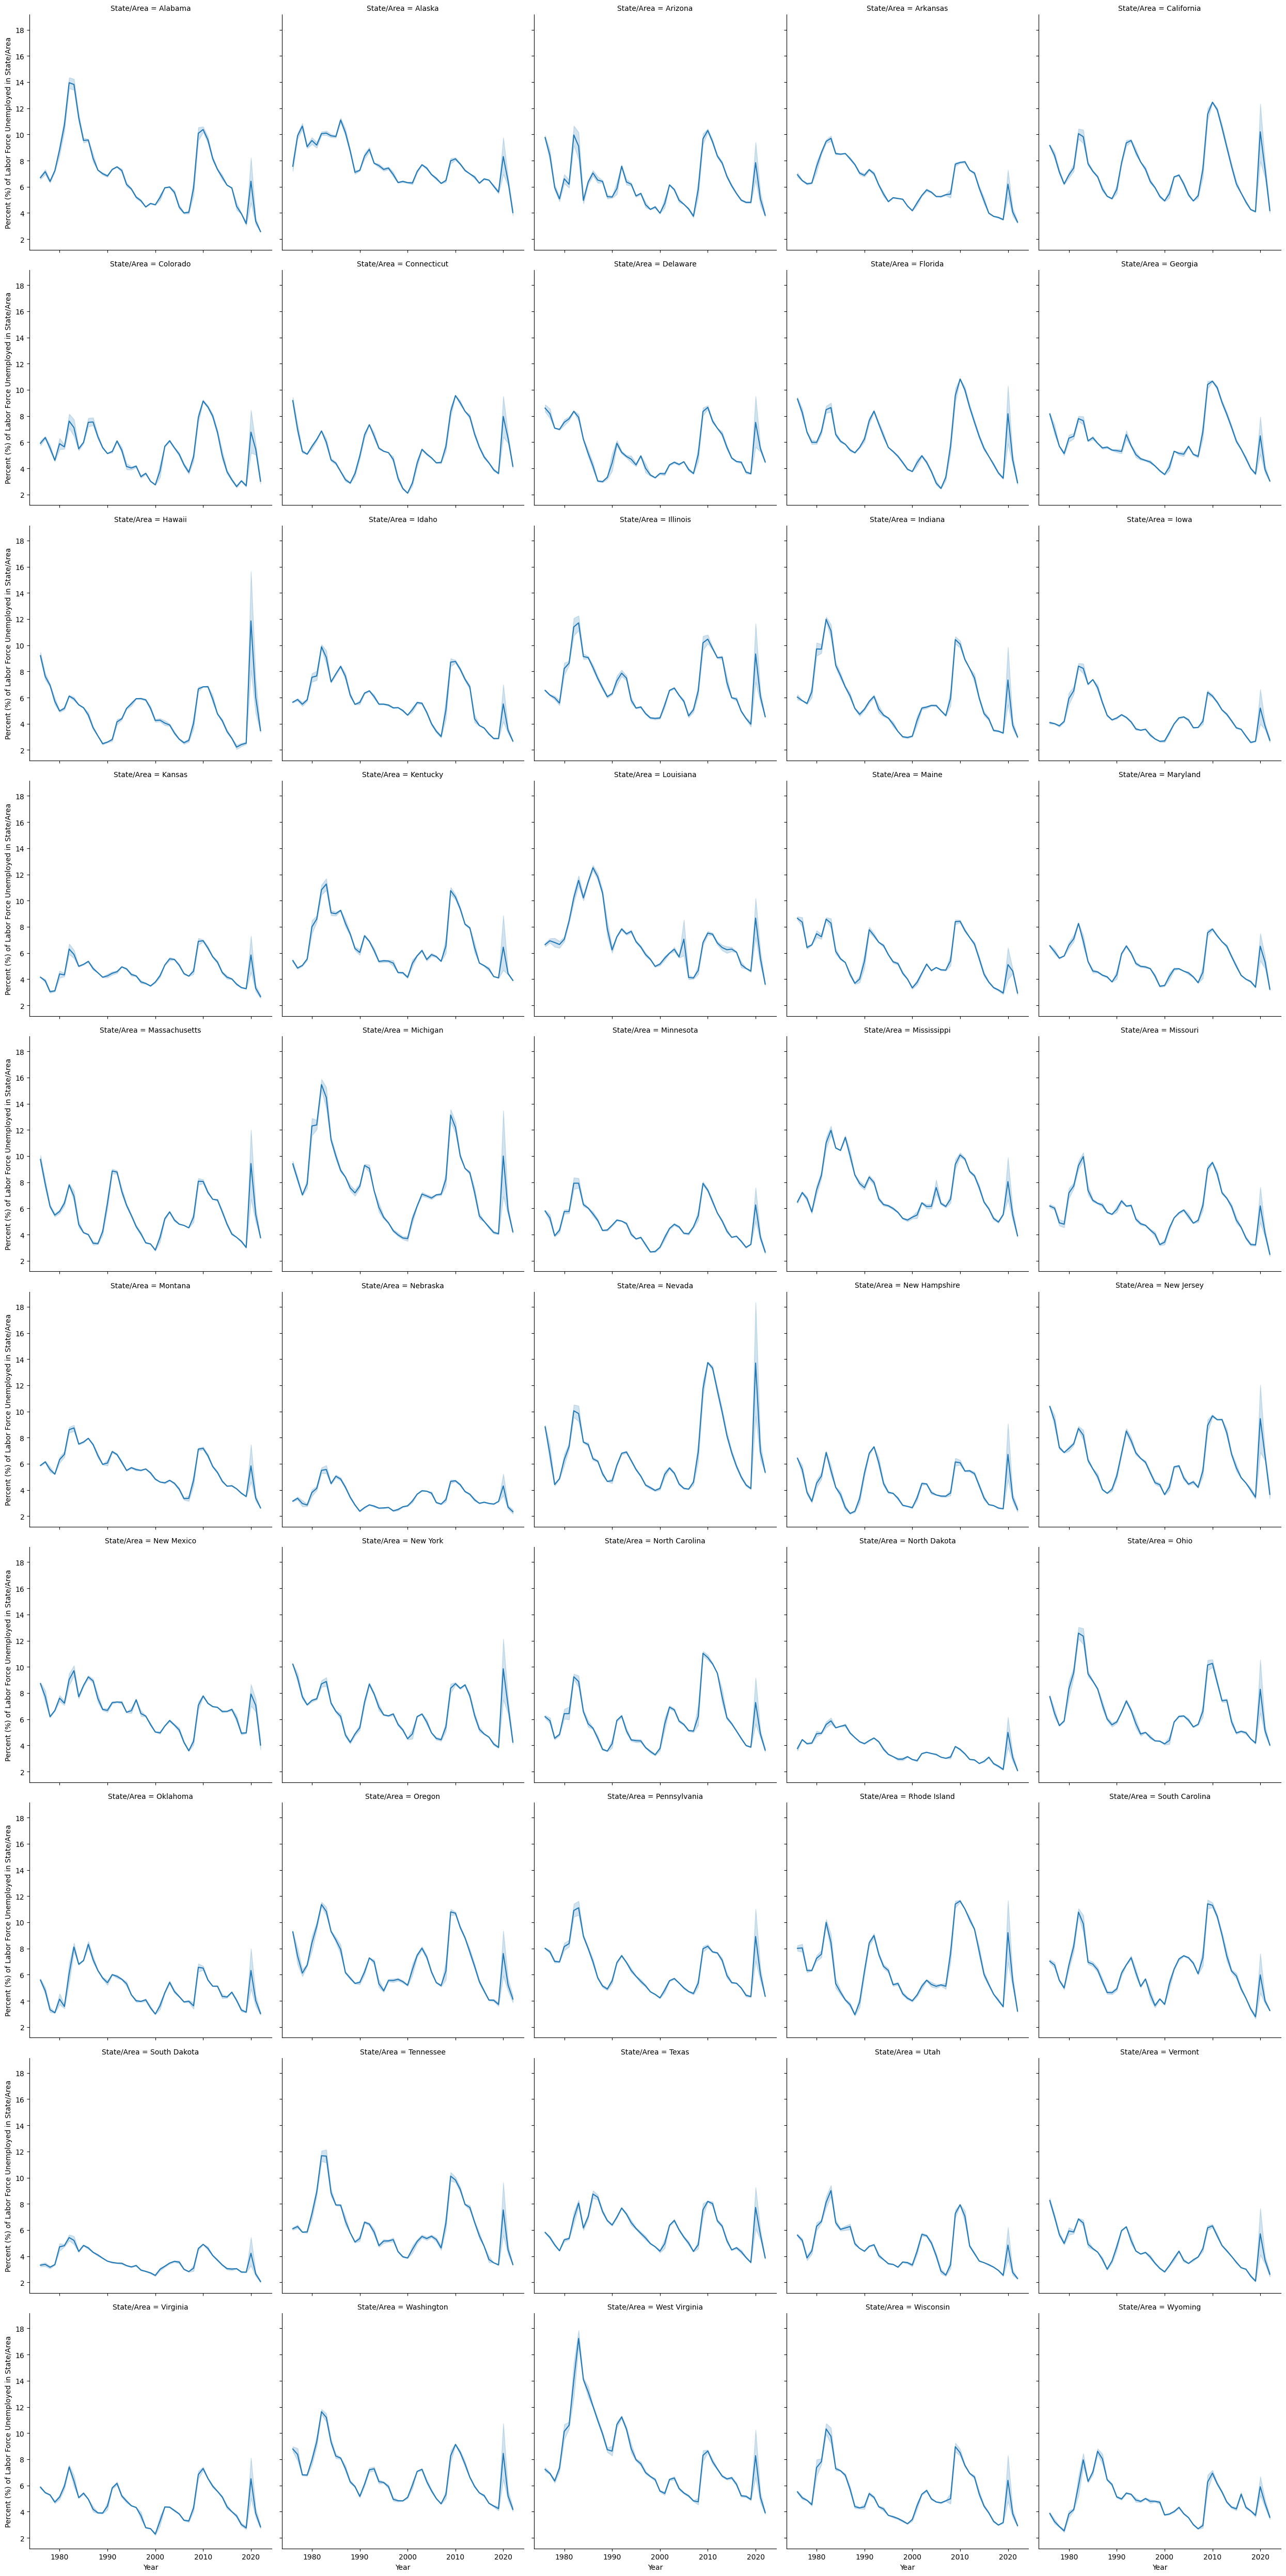

In [20]:
plt.figure(figsize=(18, 12))
g = sns.relplot(x='Year', y='Percent (%) of Labor Force Unemployed in State/Area', kind='line', data=df, col='State/Area', col_wrap=5)

plt.show()

Now lets look at the highest unemployent and lowest LFPR any state has experienced.

In [31]:
High_Unemp = df.sort_values(by='Percent (%) of Labor Force Unemployed in State/Area', ascending=False).head(10)\
 [['State/Area', 'Year', 'Month', 'Percent (%) of Labor Force Unemployed in State/Area']]

Low_LFPR = df.sort_values(by='Percent (%) of Labor Force Employed in State/Area', ascending=True).head(10)\
 [['State/Area', 'Year', 'Month', 'Percent (%) of Labor Force Employed in State/Area']]

display(High_Unemp.head())
display(Low_LFPR.head())

,State/Area,Year,Month,Percent (%) of Labor Force Unemployed in State/Area
28172,Nevada,2020,4,30.6
28225,Nevada,2020,5,24.7
28166,Michigan,2020,4,22.6
28155,Hawaii,2020,4,22.6
28208,Hawaii,2020,5,20.8


,State/Area,Year,Month,Percent (%) of Labor Force Employed in State/Area
28172,Nevada,2020,4,41.6
4608,West Virginia,1983,3,42.4
4661,West Virginia,1983,4,42.4
4714,West Virginia,1983,5,42.5
4555,West Virginia,1983,2,42.5


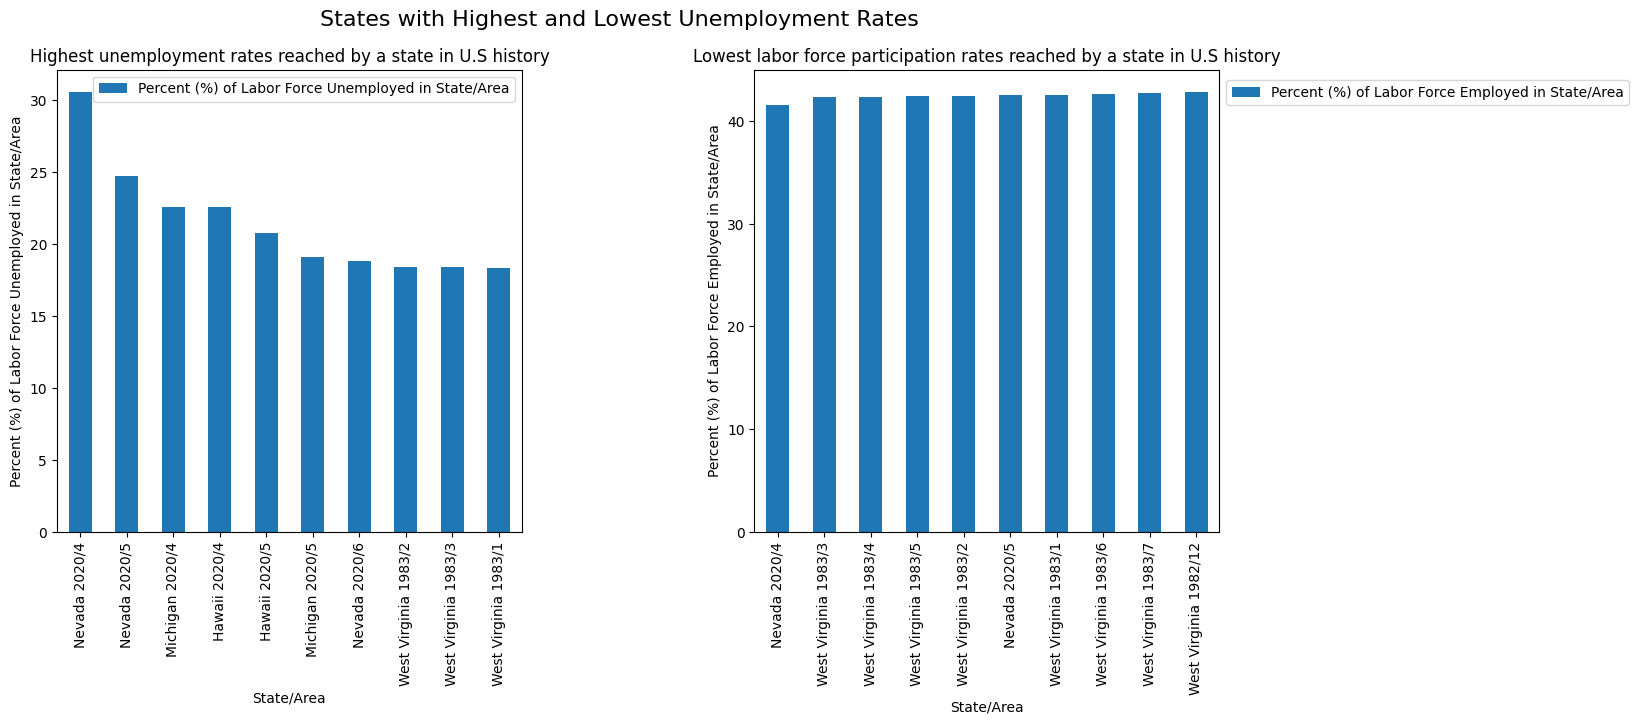

In [29]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('States with Highest and Lowest Unemployment Rates', fontsize=16)

High_Unemp.plot(kind='bar', x='State/Area', y='Percent (%) of Labor Force Unemployed in State/Area', ax=ax[0])
ax[0].set_xticklabels(High_Unemp['State/Area'] + ' ' + High_Unemp['Year'].astype(str) + '/' + High_Unemp['Month'].astype(str))
ax[0].set_xlabel('State/Area')
ax[0].set_ylabel('Percent (%) of Labor Force Unemployed in State/Area')
ax[0].set_title('Highest unemployment rates reached by a state in U.S history')


Low_LFPR.plot(kind='bar', x='State/Area', y='Percent (%) of Labor Force Employed in State/Area', ax=ax[1])
ax[1].set_xticklabels(Low_LFPR['State/Area'] + ' ' + Low_LFPR['Year'].astype(str) + '/' + Low_LFPR['Month'].astype(str))
ax[1].set_xlabel('State/Area')
ax[1].set_ylabel('Percent (%) of Labor Force Employed in State/Area')
ax[1].set_title('Lowest labor force participation rates reached by a state in U.S history')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.95))


plt.subplots_adjust(wspace=0.5)


plt.show()

Now lets try to make some predictions with the random walk method. This method requires us to generate random percent changes based off of the data to predict future values. We will only be doing this for the first month of every year, so yearly unemployment
**This is not an accurate way to predict futre unemployment, simply based off of percent change/trend rates in the past

In [15]:
seed(42)
yearly_unemp = df[df['Month'] == 1][['State/Area', 'Year', 'Percent (%) of Labor Force Unemployed in State/Area']]
display(yearly_unemp.head())

,State/Area,Year,Percent (%) of Labor Force Unemployed in State/Area
0,Alabama,1976,6.6
1,Alaska,1976,7.1
2,Arizona,1976,10.2
3,Arkansas,1976,7.3
4,California,1976,9.2


In [16]:
states = yearly_unemp['State/Area'].unique()
print(states)
print("*******Nevada, Michigan, and Ohio data is most skewed, so it is important to get its index********")
print("Nevada's index: ", list(states).index('Nevada'))
print("*****")
print("Michigan's index: ", list(states).index('Michigan'))
print("*****")
print("Ohio's index: ", list(states).index('Ohio'))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
*******Nevada, Michigan, and Ohio data is most skewed, so it is important to get its index********
Nevada's index:  27
*****
Michigan's index:  21
*****
Ohio's index:  34


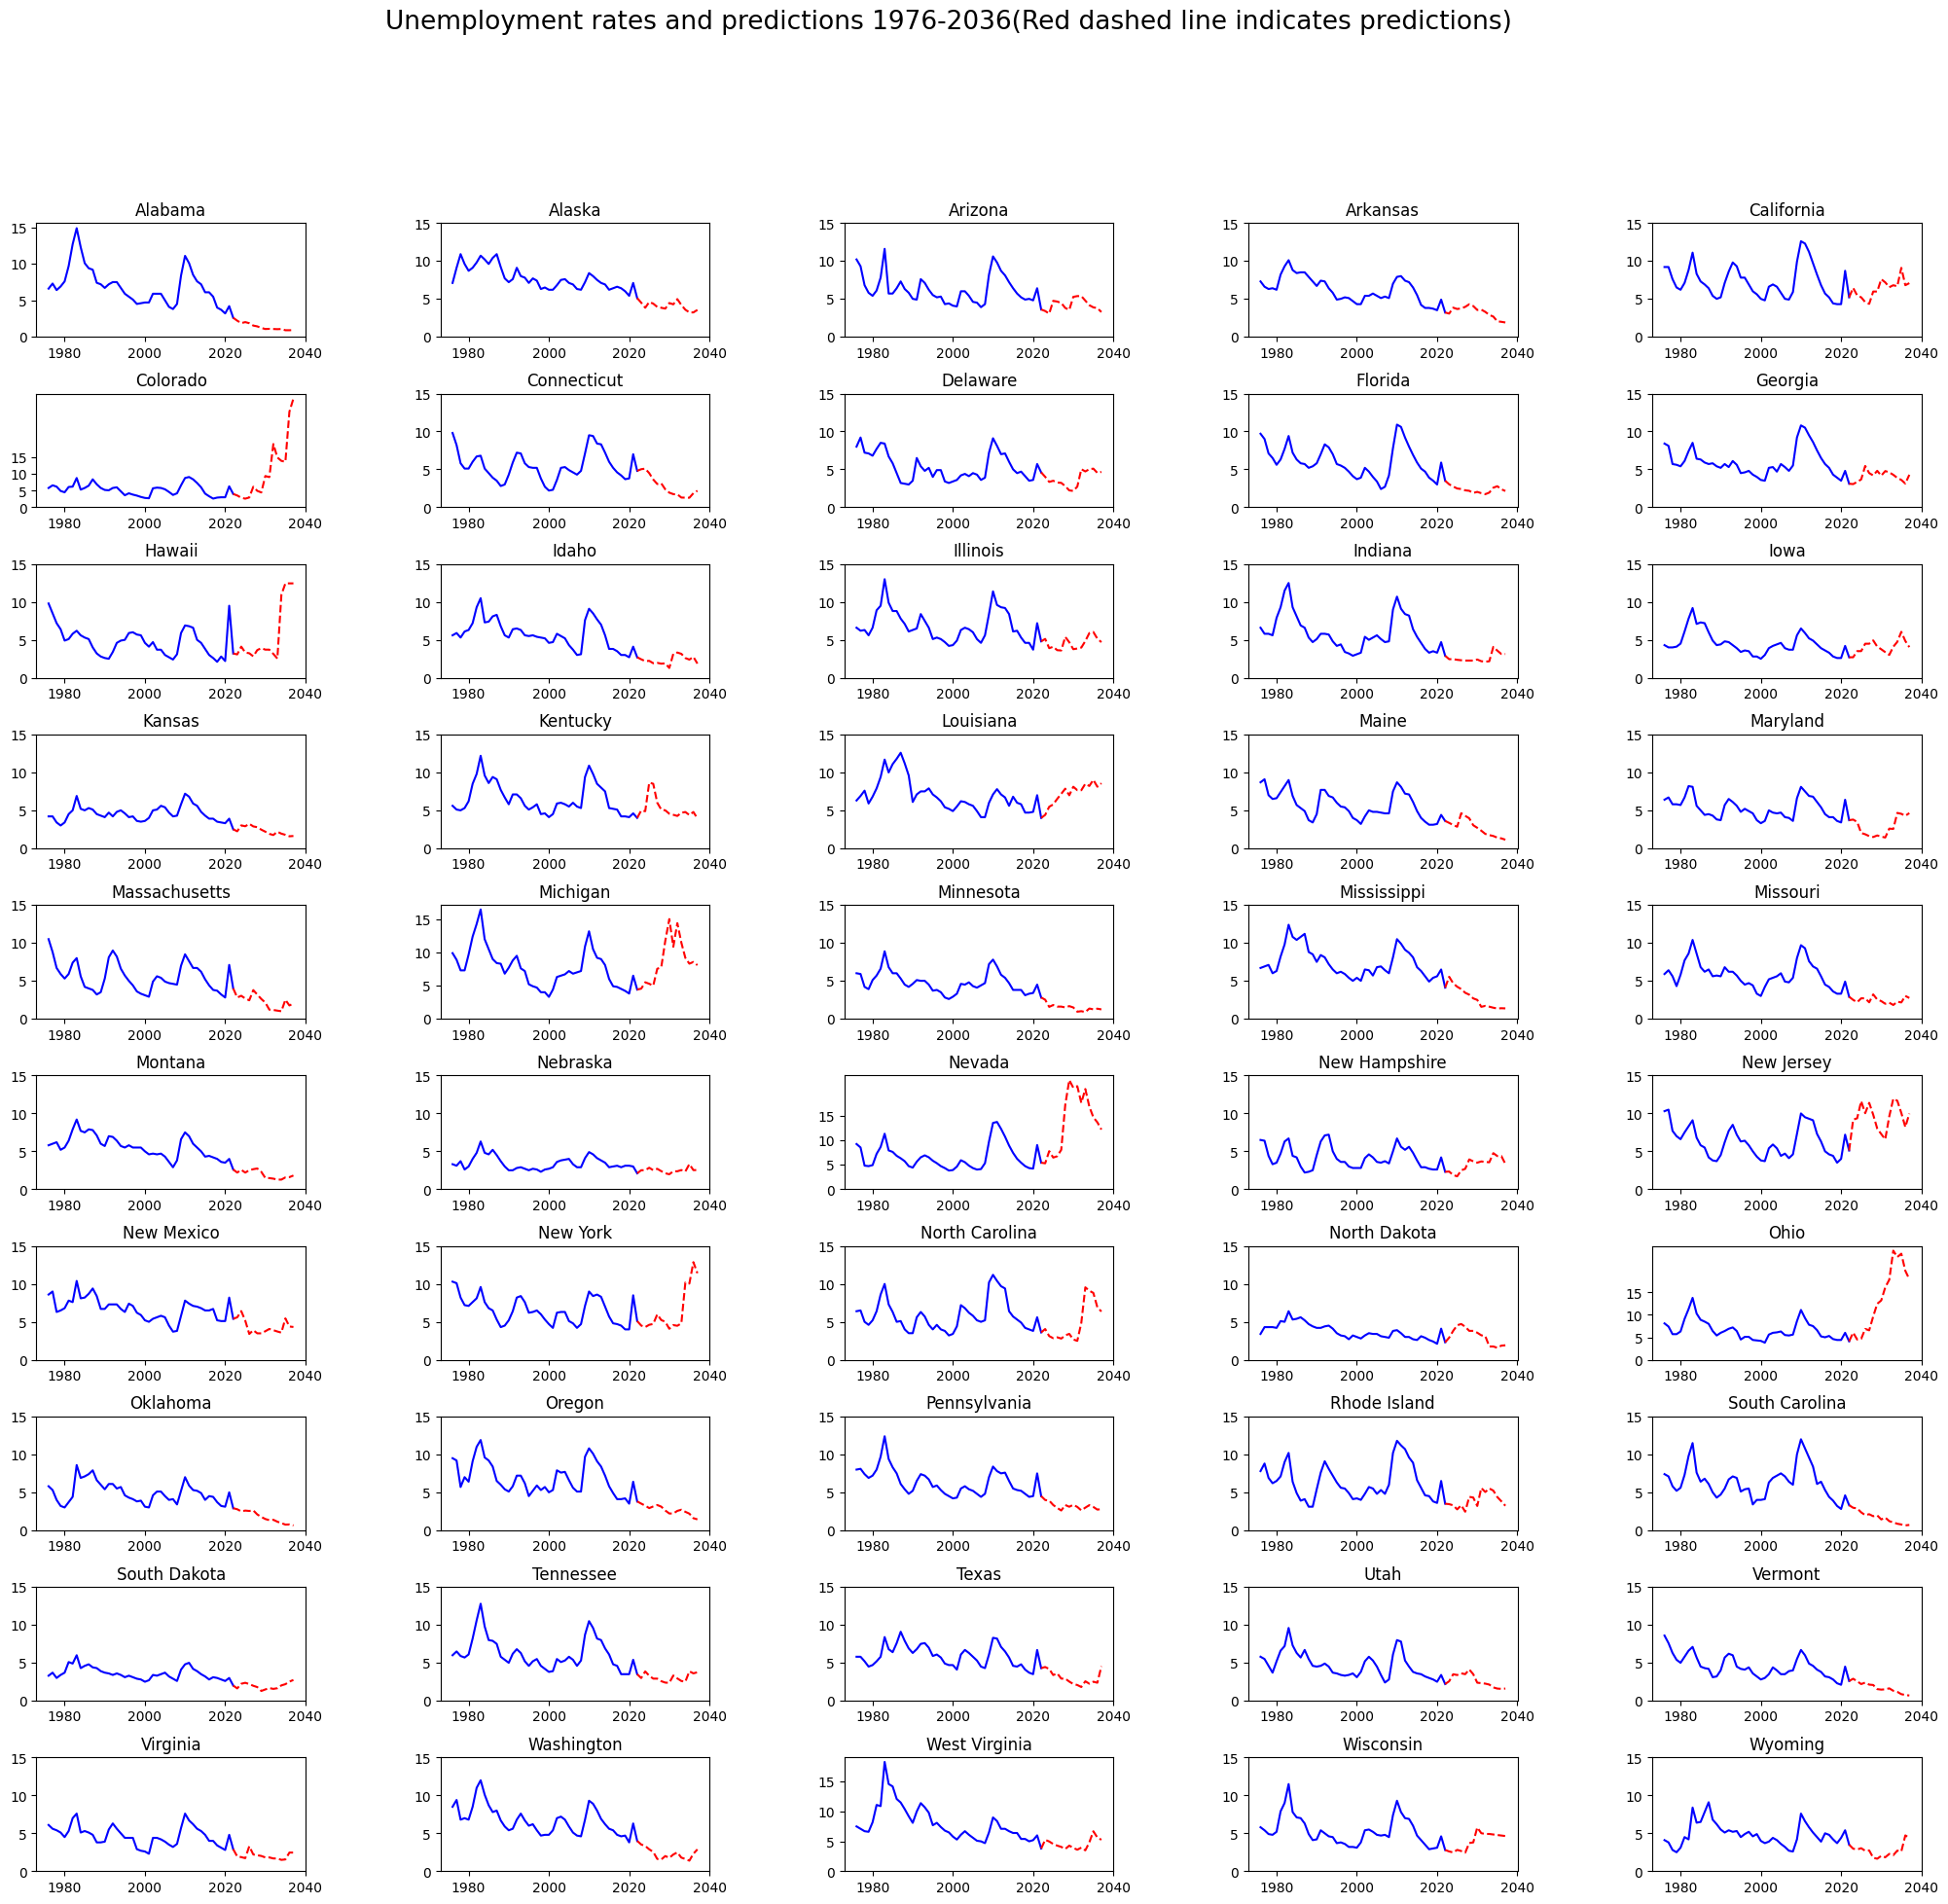

In [17]:
fig, ax = plt.subplots(10, 5, figsize=(25, 22))
fig.suptitle('Unemployment rates and predictions 1976-2036(Red dashed line indicates predictions)', fontsize=19)
for i in range(len(states)):
  state_data = yearly_unemp[yearly_unemp['State/Area'] == states[i]]
  state_data_pct_change = state_data['Percent (%) of Labor Force Unemployed in State/Area'].pct_change().add(1).dropna()
  last = state_data.iloc[-1:]

  new_df = pd.DataFrame({
      'State/Area': [states[i] for x in range(15)],
      'Year': [x+2023 for x in range(15)],
      'Percent (%) of Labor Force Unemployed in State/Area': choice(state_data_pct_change, size=15)
  })
  joined = pd.concat([last, new_df])
  joined['Percent (%) of Labor Force Unemployed in State/Area'] = joined['Percent (%) of Labor Force Unemployed in State/Area'].cumprod()

  row = i // 5
  col = i % 5
  ax[row, col].plot(state_data['Year'], state_data['Percent (%) of Labor Force Unemployed in State/Area'], color='b')
  ax[row, col].plot(joined['Year'], joined['Percent (%) of Labor Force Unemployed in State/Area'], color='r', linestyle='--')
  ax[row, col].set_title(states[i])

  if i != 27 or i != 21 or i != 34:
    ax[row, col].set_yticks([x for x in range(16) if x%5 == 0])
  else:
    ax[row, col].set_yticks([x for x in range(26) if x%5 == 0])

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

Now lets look at correlations amongst this data

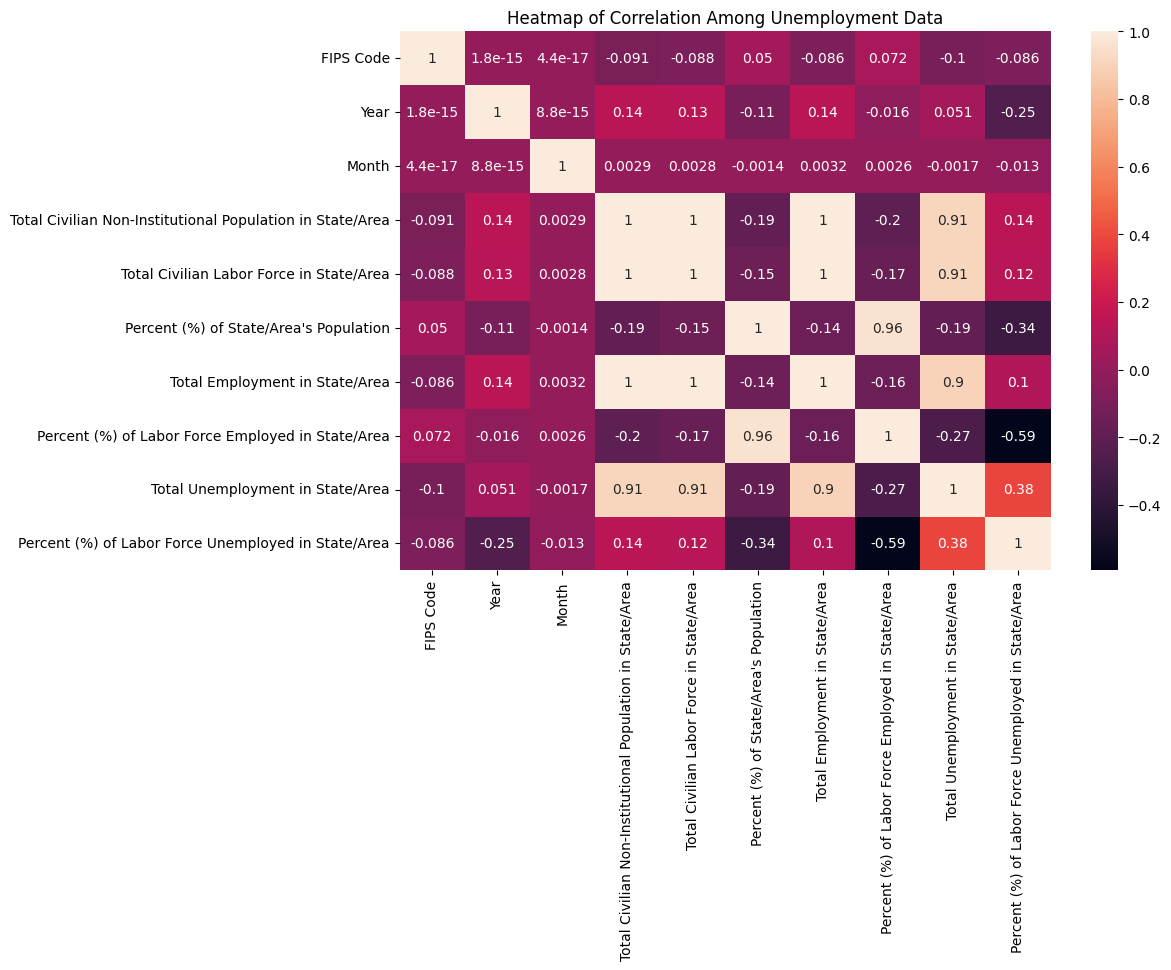

In [18]:
plt.figure(figsize=(10.5, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Heatmap of Correlation Among Unemployment Data')
plt.show()

As we can see from the heatmap above, there are many strong correlations in the dataset. Lets run a linear regression model on the variables, "Total Unemployment in State/Area" and "Total Employment in State/Area"

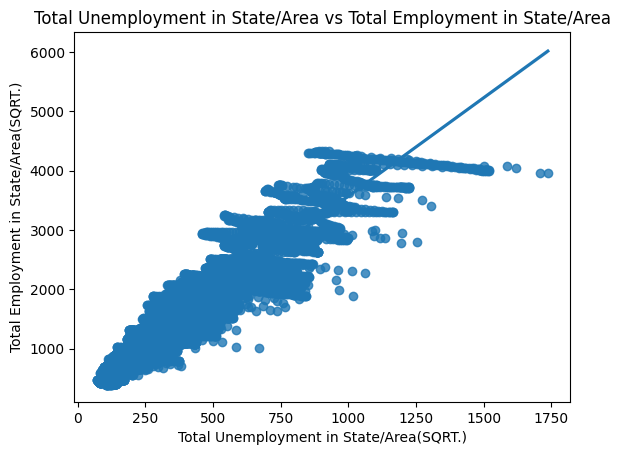

In [19]:
sns.regplot(x=np.sqrt(df['Total Unemployment in State/Area']), y=np.sqrt(df['Total Employment in State/Area']))
plt.xlabel('Total Unemployment in State/Area(SQRT.)')
plt.ylabel('Total Employment in State/Area(SQRT.)')
plt.title('Total Unemployment in State/Area vs Total Employment in State/Area')

plt.show()